In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [3]:
df = read_merged().reset_index()
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [4]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [5]:
model = FourQuarterAverageModel()
model

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [7]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


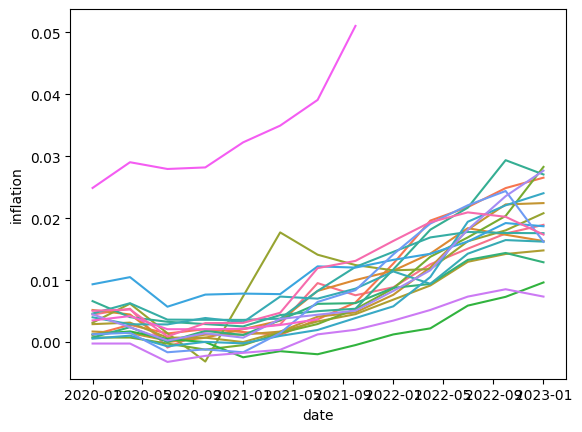

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [9]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
160,2022-01-01,Australia,0.008847,0.021295
161,2022-01-01,Belgium,0.012674,0.033275
162,2022-01-01,Canada,0.011531,0.020211
163,2022-01-01,Denmark,0.007637,0.021536
164,2022-01-01,France,0.006854,0.014870
...,...,...,...,...
255,2023-01-01,Sweden,0.027675,0.014955
256,2023-01-01,Switzerland,0.007345,0.010084
257,2023-01-01,Türkiye,NaN,NaN
258,2023-01-01,United Kingdom,NaN,NaN


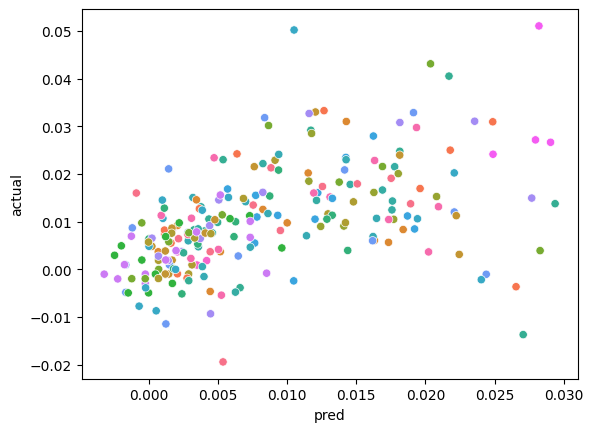

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     79.93
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.20e-16
Time:                        13:41:23   Log-Likelihood:                 768.80
No. Observations:                 236   AIC:                            -1534.
Df Residuals:                     234   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.001      4.993      0.000       0.003       0.006
pred           0.6906      0.077      8.940      0.000       0.538       0.843
==============================================================================
Omnibus:                       16.994   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.540
Skew:                           0.143   Prob(JB):                     1.75e-11
Kurtosis:                       5.226   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

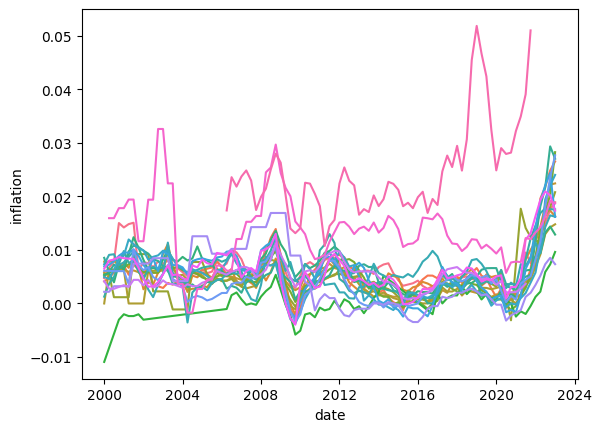

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Splits: 100%|██████████| 5/5 [00:00<00:00, 109.90it/s]
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

,date,country,inflation
0,1999-04-01,Japan,0.004849
1,2000-01-01,Canada,0.005820
2,2000-01-01,United States,0.009048
3,2000-01-01,Australia,0.007048
4,2000-01-01,New Zealand,0.003326
...,...,...,...
1799,2023-01-01,Norway,-0.004244
1800,2023-01-01,Belgium,0.011175
1801,2023-01-01,Korea,0.007835
1802,2023-01-01,South Africa,0.010410


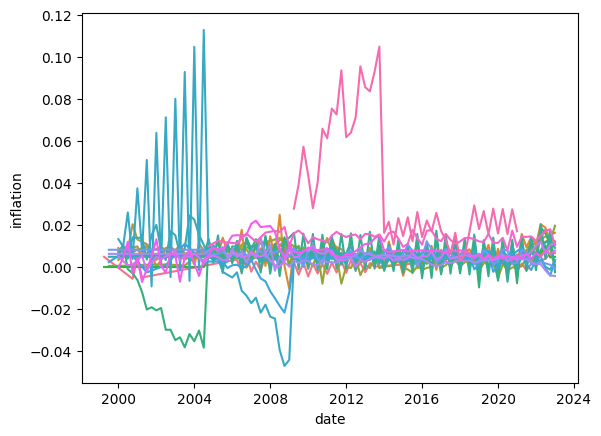

In [18]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [19]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

Splits: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


,date,country,inflation
0,2000-01-01,Australia,0.004676
1,2000-01-01,Belgium,-0.000205
2,2000-01-01,Canada,-0.003708
3,2000-01-01,Denmark,-0.001454
4,2000-01-01,France,-0.000054
...,...,...,...
1799,2023-01-01,Sweden,0.011736
1800,2023-01-01,Switzerland,0.012828
1801,2023-01-01,Türkiye,0.044421
1802,2023-01-01,United Kingdom,0.007336


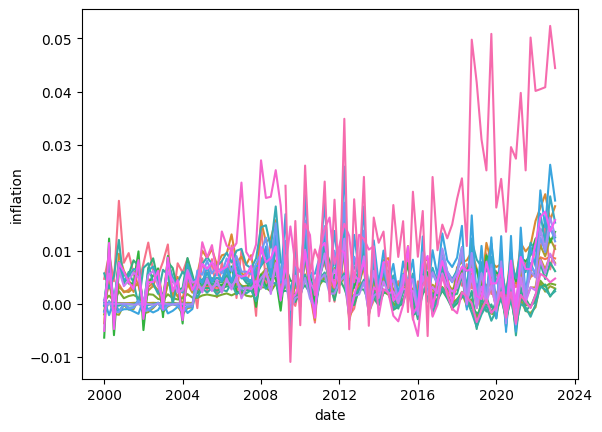

In [20]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [21]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset...


100%|██████████| 20/20 [00:00<00:00, 64.32it/s]


Fitted!


Splits: 100%|██████████| 5/5 [00:30<00:00,  6.18s/it]


,inflation,country,date
0,0.007414,Japan,1999-04-01
1,0.006281,Canada,2000-01-01
2,0.005987,United States,2000-01-01
3,0.004049,Australia,2000-01-01
4,0.000222,New Zealand,2000-01-01
...,...,...,...
1829,0.010600,Norway,2023-01-01
1830,0.032533,Belgium,2023-01-01
1831,0.013050,Korea,2023-01-01
1832,0.015167,South Africa,2023-01-01


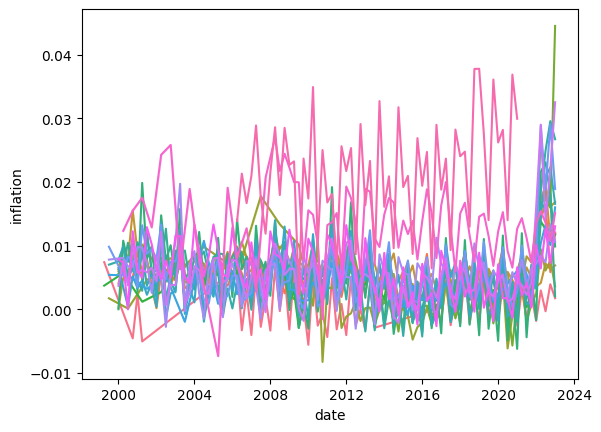

In [22]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [23]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 11.58it/s]


,date,country,inflation
0,2000-01-01,Australia,0.010226
1,2000-01-01,Belgium,0.003297
2,2000-01-01,Canada,0.008125
3,2000-01-01,Denmark,0.006748
4,2000-01-01,Italy,0.004280
...,...,...,...
1648,2023-01-01,South Africa,0.013202
1649,2023-01-01,Spain,-0.008930
1650,2023-01-01,Sweden,-0.006090
1651,2023-01-01,Switzerland,-0.004694


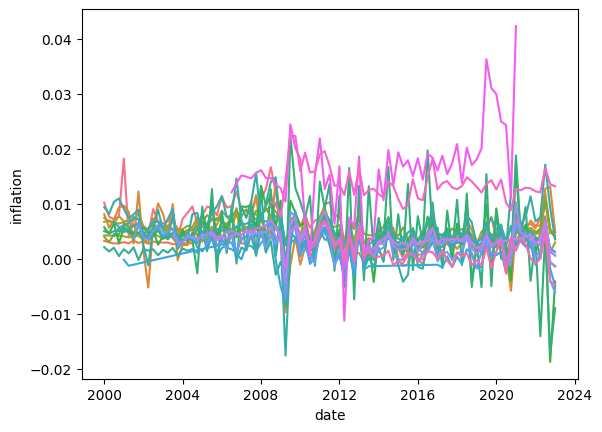

In [24]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [17]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Creating regression coefficients: 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


,country,inflation,date
0,Australia,0.012471,2000-01-01
1,Belgium,0.004896,2000-01-01
2,Canada,0.009430,2000-01-01
3,Denmark,0.009311,2000-01-01
4,Italy,0.006783,2000-01-01
...,...,...,...
1648,South Africa,0.011616,2023-01-01
1649,Spain,-0.008762,2023-01-01
1650,Sweden,-0.009185,2023-01-01
1651,Switzerland,-0.013112,2023-01-01


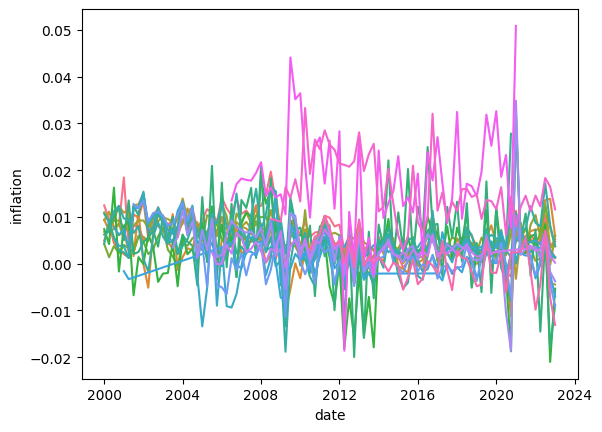

In [18]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [19]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

Creating regression coefficients: 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


In [20]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

United Kingdom   -0.697869
France           -0.600190
Belgium          -0.567367
Netherlands      -0.549662
Germany          -0.484883
Switzerland      -0.428861
Portugal         -0.420357
Spain            -0.419118
New Zealand      -0.379993
Denmark          -0.299375
Italy            -0.275587
mean             -0.252335
Norway           -0.248003
Sweden           -0.173401
South Africa      0.001279
United States     0.075711
Australia         0.081059
Korea             0.108449
Canada            0.162730
Japan             0.321071
dtype: float64

<Axes: xlabel='date'>

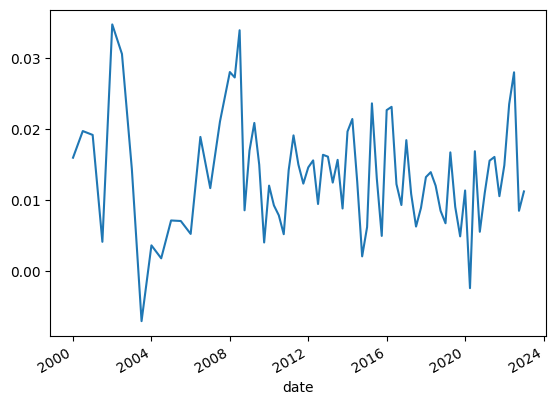

In [21]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

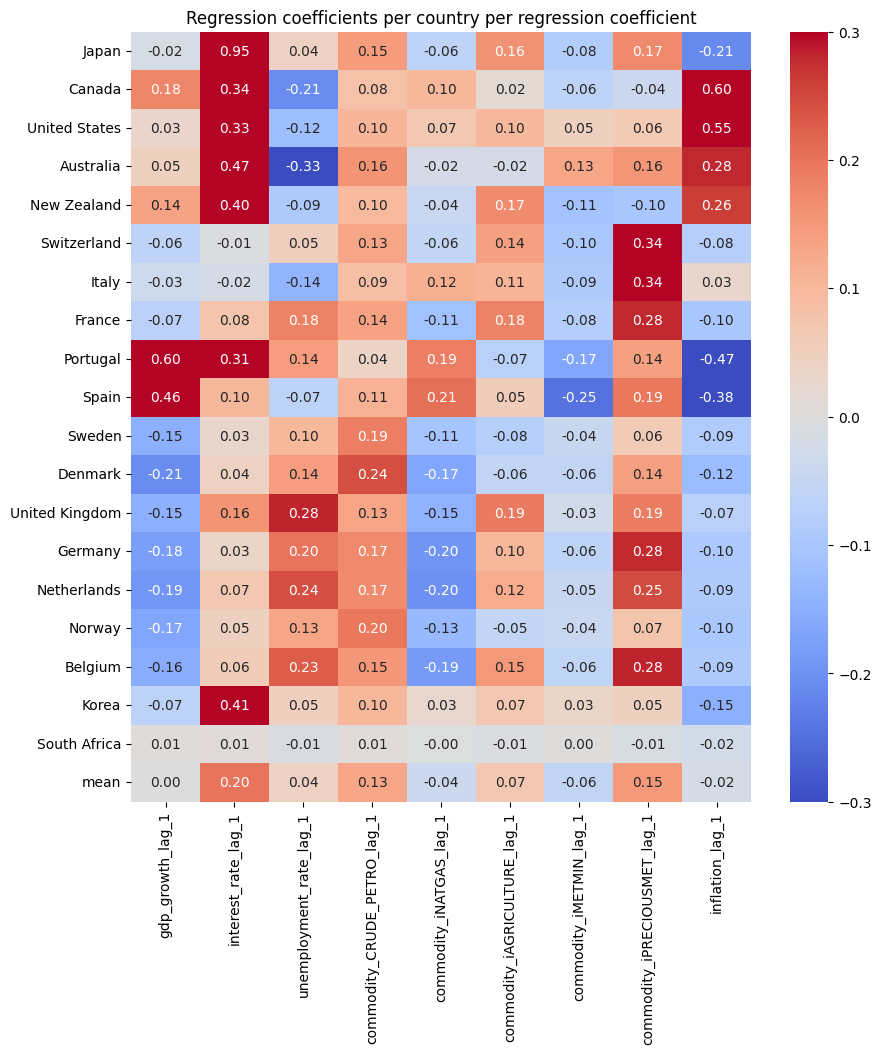

In [22]:
sns.heatmap(pd.DataFrame(
    model.regression_coefficients.mean(axis = 0),
    index = model.countries.tolist() + ["mean"],
    columns = model.regression_columns
), annot = True, fmt = ".2f", vmin = -0.3, vmax = 0.3, cmap = "coolwarm")
plt.title("Regression coefficients per country per regression coefficient")
# increase fig size
plt.gcf().set_size_inches(10, 10)

In [23]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

,country,inflation,date
0,Australia,0.012353,2000-01-01
1,Belgium,0.005619,2000-01-01
2,Canada,0.009306,2000-01-01
3,Denmark,0.009012,2000-01-01
4,Italy,0.006851,2000-01-01
...,...,...,...
1648,South Africa,0.008614,2023-01-01
1649,Spain,0.007836,2023-01-01
1650,Sweden,0.001383,2023-01-01
1651,Switzerland,-0.001199,2023-01-01


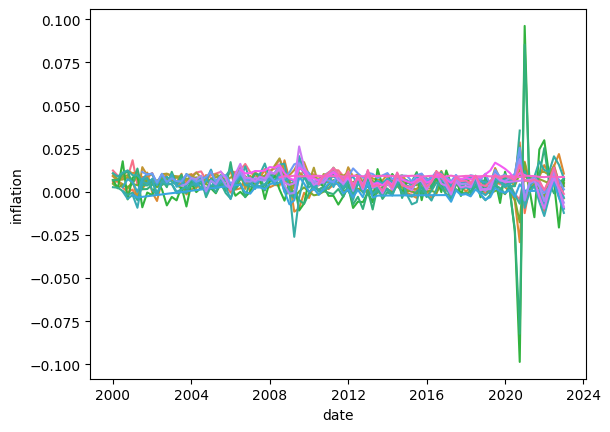

In [24]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [25]:
preds.query("inflation > 1")

,country,inflation,date


In [26]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

date,2020-04-01
country,Spain
inflation,0.000963
gdp_growth,-17.64025
interest_rate,0.0
unemployment_rate,15.3
commodity_CRUDE_PETRO,0.225235
commodity_iNATGAS,-0.183155
commodity_iAGRICULTURE,0.004542
commodity_iMETMIN,0.072359
commodity_iPRECIOUSMET,0.100256


In [27]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

,feature_value,percentile
date,2020-04-01,2020-04-01
country,Spain,Spain
inflation,0.000963,20.175035
gdp_growth,-17.64025,0.092123
interest_rate,0.0,9.672962
unemployment_rate,15.3,93.965914
commodity_CRUDE_PETRO,0.225235,90.925841
commodity_iNATGAS,-0.183155,11.008752
commodity_iAGRICULTURE,0.004542,56.932289
commodity_iMETMIN,0.072359,75.587287


In [28]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

,684
country,Switzerland
inflation,0.004441
date,2010-07-01 00:00:00


# Get scores

In [21]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel

exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        ("4qa", lambda: FourQuarterAverageModel()),
        ("pca_var", lambda: PCAVARModel()),
        ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        (
            "arx",
            lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        ),
        ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        (
            "armax",
            lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        ),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
        ("random_effects", lambda: RandomEffectsModel()),
        (
            "random_effects_x",
            lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        ),
        ("distance", lambda: DistanceModel()),
        ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/hom

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x7fdc706c7b50>)


100%|██████████| 20/20 [00:00<00:00, 49.27it/s]


Fitted!
Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x7fdc7f5d0f10>)


100%|██████████| 20/20 [00:00<00:00, 97.88it/s]


Fitted!


Creating regression coefficients: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


Creating regression coefficients: 100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


,mse,mae,r2,mz_intercept,mz_slope,mz_r2
uc_sv_ss,0.000046,0.004620,0.352174,0.001163,0.847399,0.364969
4qa,0.000054,0.005256,0.238137,0.001675,0.755154,0.266701
uc_sv,0.000059,0.005434,0.174845,0.001520,0.790203,0.189336
ar,0.000059,0.005425,0.199776,0.001072,0.788326,0.216371
pca_var,0.000065,0.005812,0.050776,0.003356,0.609696,0.150508
random_effects,0.000074,0.006074,-0.040779,0.003542,0.413849,0.040299
random_effects_x,0.000076,0.006099,-0.072701,0.004125,0.423653,0.053276
distance,0.000077,0.006179,-0.082906,0.003825,0.357684,0.036605
distance_x,0.000094,0.006906,-0.323230,0.004959,0.239144,0.033129
arma,0.000096,0.005844,-0.303053,0.003648,0.372734,0.164030
